# Standardization 



* What is standardization of Data?
* Why do we do that?
* How do we do it?

In [1]:
import pandas as pd 
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt 

In [2]:
stu_rec = {'ID':['A','B','C','D','E'], 'CGPA':[3.0, 3.0, 4.0, 4.5, 4.2], 'Salary in k': [60, 40, 40, 50, 52]}

In [3]:
print(stu_rec)

{'ID': ['A', 'B', 'C', 'D', 'E'], 'CGPA': [3.0, 3.0, 4.0, 4.5, 4.2], 'Salary in k': [60, 40, 40, 50, 52]}


In [4]:
df = pd.DataFrame.from_dict(stu_rec)

In [5]:
df.head()

,ID,CGPA,Salary in k
0,A,3.0,60
1,B,3.0,40
2,C,4.0,40
3,D,4.5,50
4,E,4.2,52


In [6]:
df_1 = df.drop(['ID'], axis = 1)

In [7]:
df_1.head()

,CGPA,Salary in k
0,3.0,60
1,3.0,40
2,4.0,40
3,4.5,50
4,4.2,52


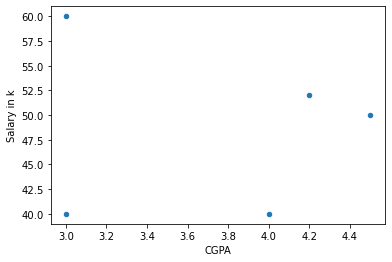

In [8]:
df_1.plot("CGPA","Salary in k",kind='scatter') 
plt.show()

Let us find the distance between A,B and B,C

In [9]:
#A = (3.0, 60)  B= (3.0, 40) 
#B= (3.0, 40),  C = (4.0, 40)
print('Distance between A, B is = ', distance.euclidean(df_1.iloc[0,:],df_1.iloc[1,:]))
print('Distance between B, C is = ', distance.euclidean(df_1.iloc[1,:],df_1.iloc[2,:]))

Distance between A, B is =  20.0
Distance between B, C is =  1.0


### Why distance between B,C is less compared to distance between A,B?

### How to ovecome this problem? 


* Standardization
* Normalization

#### Standardization

Suppose $x$ belong to the dataset. Let $x'$ be the standardized version of $x$ and is given by                                                               $$x' = \frac{x-\mu}{\sigma}$$                                                                      where $\mu$ and $\sigma$ are mean and standard deviation of the dataset.

Note that now the standardized data has zero mean and unit variance.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_1)
df_1_std = pd.DataFrame(scaler.transform(df_1),columns=df_1.columns)
df_1_std

,CGPA,Salary in k
0,-1.184341,1.520013
1,-1.184341,-1.100699
2,0.416120,-1.100699
3,1.216350,0.209657
4,0.736212,0.471728


In [11]:
print('Distance between A, B is = ', distance.euclidean(df_1_std.iloc[0,:],df_1_std.iloc[1,:]))
print('Distance between B, C is = ', distance.euclidean(df_1_std.iloc[1,:],df_1_std.iloc[2,:]))

Distance between A, B is =  2.620712091804796
Distance between B, C is =  1.6004609991611995


In [12]:
print(df_1.describe())


          CGPA  Salary in k
count  5.00000     5.000000
mean   3.74000    48.400000
std    0.69857     8.532292
min    3.00000    40.000000
25%    3.00000    40.000000
50%    4.00000    50.000000
75%    4.20000    52.000000
max    4.50000    60.000000


In [13]:
print(df_1_std.describe())

               CGPA   Salary in k
count  5.000000e+00  5.000000e+00
mean   3.996803e-16  2.220446e-16
std    1.118034e+00  1.118034e+00
min   -1.184341e+00 -1.100699e+00
25%   -1.184341e+00 -1.100699e+00
50%    4.161199e-01  2.096570e-01
75%    7.362121e-01  4.717282e-01
max    1.216350e+00  1.520013e+00


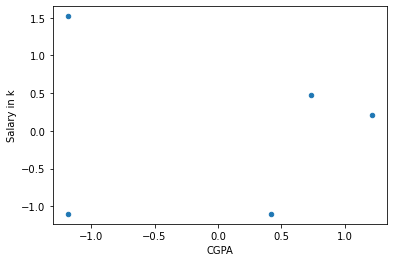

In [14]:
df_1_std.plot("CGPA","Salary in k",kind='scatter') 
plt.show()

### Normalization

Suppose $x$ belong to the dataset. Let $x'$ be the standardized version of $x$ and is given by                                                               $$x' = \frac{x-x_{\min}}{x_{\max}-x_{\min}}$$.                                                                      where $x_{\min}$ and $x_{\max}$ are the mininum and maximum values.

Note that $0 \leq x' \leq 1$.

### Find any normalization function available in exixting libraries, if not write you own..

Resources

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
